In [19]:
from PIL import Image
import pytesseract
import numpy as np
import pickle

In [15]:
filename = 'C:\\Users\\16477\\Desktop\\projects\\sudoku-solver\\examples\\board_4_4.jpg'

In [16]:
img1 = np.array(Image.open(filename))

In [27]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [20]:
with open('C:\\Users\\16477\\Desktop\\projects\\sudoku-solver\\examples\\board_4_4.pkl','rb') as f:
    x = pickle.load(f)
    print(x.shape)

(53, 68)


In [37]:
#filename = 'image_01.png'
#img1 = np.array(Image.open(filename))
text = pytesseract.image_to_string(x)

In [38]:
text

''

In [35]:
x = 255 - x

In [289]:
from PIL import Image

image = Image.open("C:\\Users\\16477\\Desktop\\projects\\sudoku-solver\\examples\\test15.jpg")

In [165]:
#image_array = np.array(image)

In [166]:
#image_array

In [167]:
#new_array = np.zeros((image_array.shape[0],image_array.shape[1],3))

In [168]:
#new_array[:,:,0] = image_array
#new_array[:,:,1] = image_array
#new_array[:,:,2] = image_array

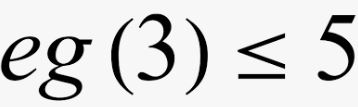

In [290]:
image

In [293]:
image=np.array(image)

In [169]:
#new_array = new_array(dtype=int)

In [295]:
start=time.time()
text = pytesseract.image_to_string(image)
end=time.time()
print(end-start)

0.187819242477417


In [296]:
text

'eg(3)<5\n'

In [122]:
image

In [312]:
image = Image.open("C:\\Users\\16477\\Desktop\\projects\\sudoku-solver\\examples\\Capture.jpg")

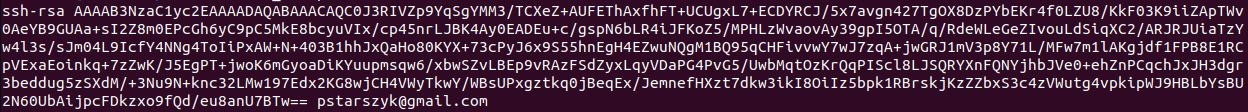

In [313]:
image

In [314]:
text = pytesseract.image_to_string(image)

In [315]:
text

'ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQCOI3RIVZP9YQSGYMM3 / TCXeZ+AUFEThAXfhFT+UCUgXL7+ECDYRCI/5x7avgn427TgOX8DzPYbEKr4fOLZU8/KkFO3K91iZApTWV\nOAeYB9GUAa+S12Z8MOEPCGh6yC9pCSMKESbcyuVIx /cp45nrLJBK4AyOEADEU+C/gSpNObLR4iIFKOZ5 /MPHLZWvaovAy39gpI50TA/q/RdeWLeGeZIvouLdSiqxC2/ARIRIUiaTzY\nW413s /SIMO4L 9TcFY4NNG4TOIiPXAW+N+403B1hhIxQaHo8OKYX+73cPyJ6x9S5 ShnEgH4EZWUNQGM1BQ95qCHF ivVWY7wI7ZqA+ jWGRI1MV3pBY71L /MFW7M1 LAKg jdf 1FPBBE1RC\npVExaEoinkq+7zZwK/JSEgPT+jwoK6mGyoaDi kYuupmsqu6 /xbwWSZVLBEp9VRAzFSdZyxL qyVDaPG4PVGS /UwbMqtOzKrQqPIScLBLISQRYXNFQNY jhbIVeO+ehZnPCqchIxIH3dgr\n3beddug5zSXdM/+3NU9N+knc32LMw197Edx2KG8WjCH4VWyTkwY /WBSUPxgztkq0jBeqEx /JemnefHXzt7dkw3ik180iIz5bpk1RBrskjKzZZbxS3c4zVWutg4vpkipWwJ9HBLbYSBU\n2N6OUbAi jpcFDkzxo9fQd/eu8anU7BTw== pstarszyk@gmail.com\n\n'

In [222]:
nums = filter(lambda x: x.isdigit(), text)

In [223]:
nums

In [224]:
def getNum(*, chars: str) -> int:
    freqs = [0] * 9
    nums = int(''.join([x for x in chars if x.isdigit()]))
    while nums:
        num = nums % 10
        freqs[num - 1] += 1
        nums //= 10
    return freqs.index(max(freqs)) + 1

In [255]:
getNum(chars = text)

7

In [310]:
m

5

In [308]:
m=555

In [309]:
m %= 10

In [8]:
from pathlib import Path

In [9]:
ROOT_DIR = Path(__file__).resolve().parent

NameError: name '__file__' is not defined

In [4]:
from pathlib import Path

path1 = Path(r"C:\folder\subfolder\myfile.txt")
path2 = Path(r"C:\Myfile.txt")
print(path1.parent)
print(path2.parent)

['.ipynb_checkpoints', 'tesseract.ipynb']

In [301]:
from imutils.perspective import four_point_transform
from skimage.segmentation import clear_border
import numpy as np
import imutils
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [302]:
def locate_board(*, image: np.ndarray) -> np.ndarray:

    # adaptive thresholding
    gray = cv2.cvtColor(
        src=image,
        code=cv2.COLOR_BGR2GRAY
    )
    blurred = cv2.GaussianBlur(
        src=gray,
        ksize=(7, 7),
        sigmaX=3
    )
    thresh = cv2.adaptiveThreshold(
        src=blurred,
        maxValue=255,
        adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        thresholdType=cv2.THRESH_BINARY,
        blockSize=11,
        C=2
    )
    thresh = cv2.bitwise_not(
        src=thresh
    )

    # find contours and sort
    contours = cv2.findContours(
        image=thresh,
        mode=cv2.RETR_EXTERNAL,
        method=cv2.CHAIN_APPROX_SIMPLE
    )
    contours = imutils.grab_contours(cnts=contours)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # loop over the contours
    puzzleCnt = None
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
        if len(approx) == 4:
            puzzleCnt = approx
            break
    if puzzleCnt is not None:
        raise Exception(("Could not find board."))
    board = four_point_transform(gray, puzzleCnt.reshape(4, 2))
    return board

In [300]:
path = "C:\\Users\\16477\\Desktop\\projects\\sudoku-solver\\examples\\{}".format('board.jpg')
image = Image.open(path)
image = np.array(image)
#print('-'*25, 'Image read success', '-'*25)
#print(image)
#board = extract_array(image=image)

In [303]:
locate_board(image=image)

Exception: Could not find board.